In [1]:
#Import Files / Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Install new libraries
!pip install spectral

In [3]:
#Import Libraries

import spectral as sp
import spectral.io.envi as envi

import numpy as np
import scipy as sc

import sklearn
from sklearn.metrics import accuracy_score

import skimage
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import imageio
# sns.set()

import joblib

#Set function to convert into rgb image
def to_rgb(x):
    dim = x.shape[-1]
    bands_section = int(dim/3)
    bands = [bands_section,(dim+bands_section)//2,dim-1]
    rgb = x[...,bands]
    for i in range(3):
        l,u = rgb[...,i].min(), rgb[...,i].max()
        rgb[...,i] = (rgb[...,i] - l) / (u - l)
    return np.clip(rgb,0,1)

from PIL import Image
# Example using plotly in Google Colab for interactive image viewing to select the pixels
import plotly.express as px

import os

from sklearn.ensemble import RandomForestClassifier

# Input Hyperspectral Data

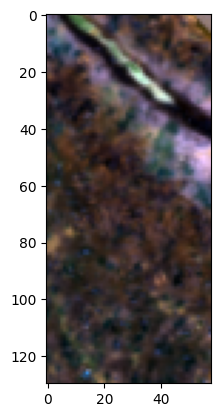

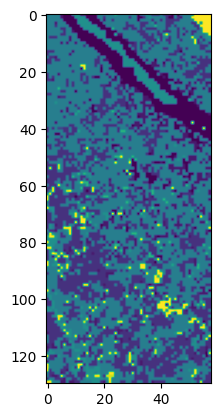

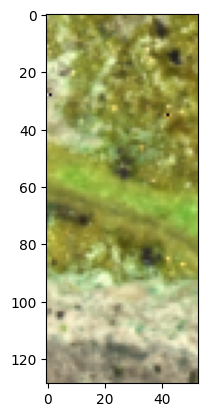

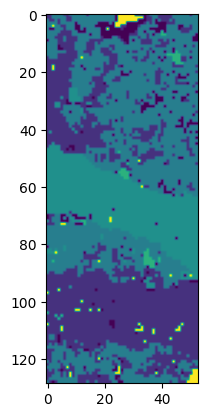

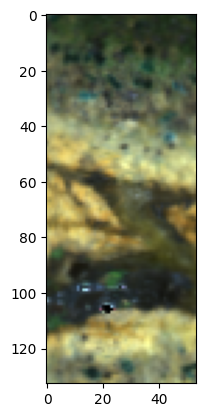

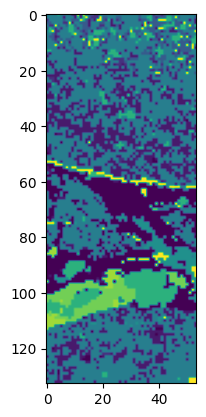

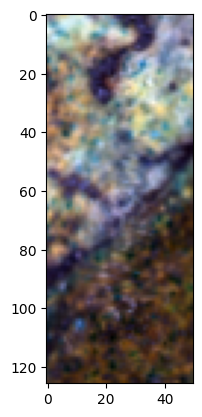

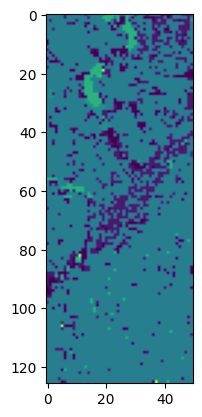

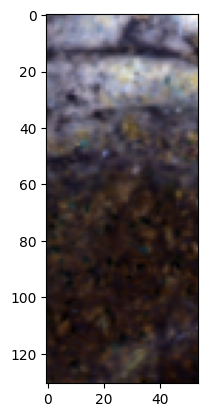

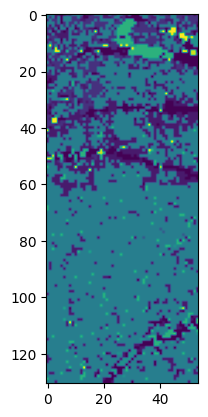

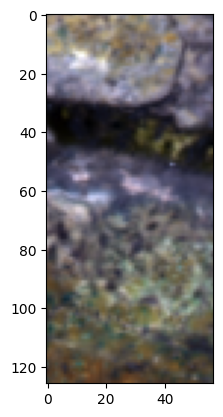

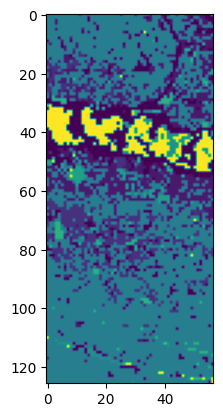

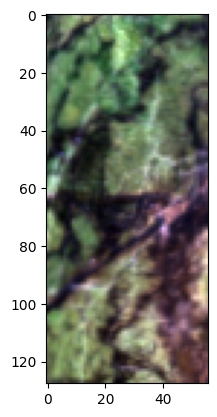

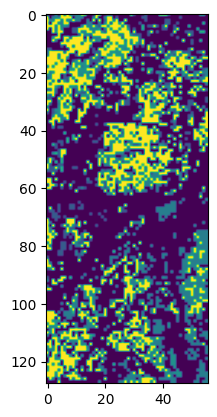

In [4]:
#Input the SEM and hyperspectral images:

# Directory containing the .npy files
folder_path = "/content/drive/MyDrive/SURF/HySpectral Project/Hyperspectral-SEM Classification/SEM-hyper_training_data"

# List all files in the directory
files = os.listdir(folder_path)

# Filter files that end with "HYPER.npy"
hyper_files = sorted([file for file in files if file.endswith("HYPER.npy")])

# Load all hyperspectral images
hyper_images = []
for file in hyper_files:
    file_path = os.path.join(folder_path, file)
    image_data = np.load(file_path)
    hyper_images.append(image_data)


# Filter files that end with "SEM.npy"
SEM_files = sorted([file for file in files if file.endswith("SEM.npy")])

# Load all SEM images
SEM_images = []
for file in SEM_files:
    file_path = os.path.join(folder_path, file)
    image_data = np.load(file_path)
    SEM_images.append(image_data)

#image_data = np.load('/content/drive/MyDrive/SURF/HySpectral Project/Hyperspectral-SEM Classification/SEM-hyper_training_data/41_HYPER.npy')


for i, image in enumerate(hyper_images):

  plt.imshow(to_rgb(image))
  plt.show()
  plt.imshow(SEM_images[i])
  plt.show()




# Train Classification Algorithm

## Preprocessing

In [5]:
# Initialize lists to store preprocessed data for training X: Hyperspectral, y: SEM
X_list = []
y_list = []

# Preprocess each image and label individually
for image, label in zip(hyper_images, SEM_images):
    # Reshape the image data into a 2D array
    n_samples = image.shape[0] * image.shape[1]
    n_features = image.shape[2]
    X = image.reshape(n_samples, n_features)

    # Reshape the label data into a 1D array
    y = label.ravel()

    # Append preprocessed data to lists
    X_list.append(X)
    y_list.append(y)

#Concatenate preprocessed data from all hyperspectral images into single arrays:
X = np.concatenate(X_list, axis=0)
#Concatenate preprocessed data from all SEM images into single arrays:
y = np.concatenate(y_list, axis=0)

## Train Model

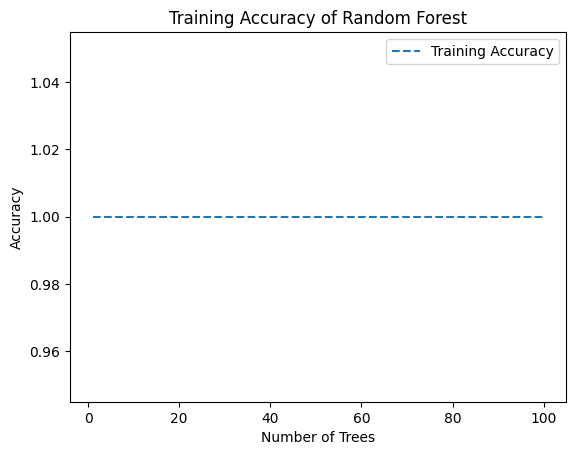

In [6]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get the accuracy of the classifier on the training set
train_accuracy = clf.score(X, y)

# Plot the training accuracy over the number of trees
num_trees = range(1, len(clf.estimators_) + 1)
plt.plot(num_trees, [train_accuracy] * len(num_trees), label='Training Accuracy', linestyle='--')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Random Forest')
plt.legend()
plt.show()

In [7]:
train_accuracy

0.9999188361098147

## Test Model

In [8]:
# Make predictions on the test data
predictions = clf.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, predictions)

accuracy

0.9999188361098147

In [9]:
y_prime.shape

NameError: name 'y_prime' is not defined

In [10]:
# Make predictions using the trained classifier
y_prime = clf.predict(X_list[0])

y_prime = y_prime.reshape(SEM_images[0].shape[0], SEM_images[0].shape[1])

[Text(1, 0, 'Quartz'),
 Text(1, 1, 'K-feldspar'),
 Text(1, 2, 'Albite'),
 Text(1, 3, 'Biotite'),
 Text(1, 4, 'Chlorite'),
 Text(1, 5, 'Kaolinite'),
 Text(1, 6, 'Muscovite/Illite'),
 Text(1, 7, 'Carbonate'),
 Text(1, 8, 'Apatite'),
 Text(1, 9, 'Pyrite'),
 Text(1, 10, 'Chalcopyrite'),
 Text(1, 11, 'Galena'),
 Text(1, 12, 'Sphalerite'),
 Text(1, 13, 'Others'),
 Text(1, 14, 'Background')]

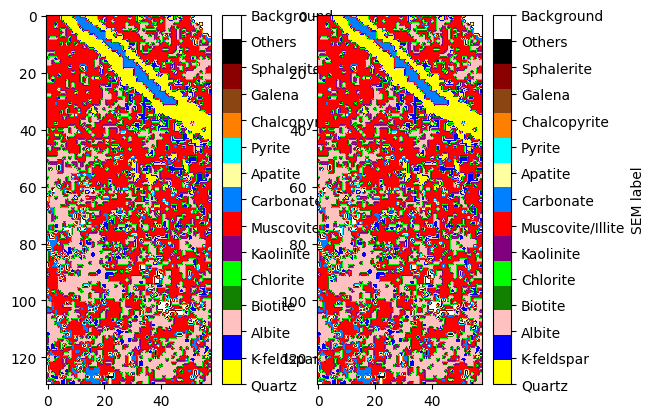

In [11]:
#Set tick anc color class labels:
#Define plotting colors dictionary:
mineral_dict = ['Quartz','K-feldspar','Albite','Biotite','Chlorite','Kaolinite','Muscovite/Illite','Carbonate','Apatite','Pyrite','Chalcopyrite','Galena','Sphalerite','Others','Background']
rgb_dict = [
    (255, 255, 0),   # Bright Yellow
    (0, 0, 255),     # Bright Blue
    (255, 192, 192),  # Light Pink
    (18, 128, 0),     # Dark Green
    (0, 255, 0),      # Green
    (128, 0, 128),    # Purple
    (255, 0, 0),     # Bright Red
    (0, 128, 255),   # Bright Sky Blue
    (255, 255, 160),  # Light Yellow
    (0, 255, 255),    # Cyan
    (255, 128, 0),    # Orange
    (139, 69, 19),    # Saddle Brown
    (139, 0, 0),      # Dark Red
    (0, 0, 0),  # Dim Gray
    (255, 255, 255)   # White
]

class_dict = np.arange(len(rgb_dict))

#Create a dictionary using a dictionary comprehension
color_to_class = {tuple(rgb_dict): class_dict for rgb_dict, class_dict in zip(rgb_dict, class_dict)}

# Create a discrete colormap with 10 colors
cmap = ListedColormap(np.array(rgb_dict)/255.0)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(y_prime, cmap = cmap)
cbar = plt.colorbar(ticks=class_dict, label='RF prediction')
cbar.ax.set_yticklabels(mineral_dict)\

plt.subplot(1,2,2)
plt.imshow(SEM_images[0], cmap = cmap)
cbar = plt.colorbar(ticks=class_dict, label='SEM label')
cbar.ax.set_yticklabels(mineral_dict)


In [64]:
#Path of hdr file image1
hdrFile1='/content/drive/MyDrive/SURF/HySpectral Project/data/training_data/testing_data_2023/B192 b_ref.hdr'


#Path of img file image1
imgFile1='/content/drive/MyDrive/SURF/HySpectral Project/data/training_data/testing_data_2023/B192 b_ref.raw'

#Open the mask
tiffFileMask1='/content/drive/MyDrive/SURF/HySpectral Project/data/CNN_results/B192 b_ref.tiff'

#Read image with plt
mask = plt.imread(tiffFileMask1)

#Select just the image first three channels: [:,:,:3]
mask = rgb2gray(mask[:,:,:3]).astype(bool)

#mask[mask == 0] = np.nan

#Expand dimension to multiply
mask1 = np.expand_dims(mask, axis=-1)

#Open image with envi
img2 = envi.open(hdrFile1, imgFile1)

#Load image
hypr1 = (img2.load())
hypr2 = (img2.load())*mask1


# Reshape the new image data into a 2D array
new_n_samples = hypr2.shape[0] * hypr2.shape[1]
n_features = hypr2.shape[-1]
X2 = hypr2.reshape(new_n_samples, n_features)


rgb_img = to_rgb(hypr2)
#rgb_img[mask == 0] = np.nan
plt.imshow(rgb_img)

# Make predictions using the trained classifier
y_prime2 = clf.predict(X2)

print(y_prime2.shape)
y_prime2 = y_prime2.reshape(hypr2.shape[0], hypr2.shape[1])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SURF/HySpectral Project/data/CNN_results/B192 b_ref.tiff'

[Text(1, 0, 'Quartz'),
 Text(1, 1, 'K-feldspar'),
 Text(1, 2, 'Albite'),
 Text(1, 3, 'Biotite'),
 Text(1, 4, 'Chlorite'),
 Text(1, 5, 'Kaolinite'),
 Text(1, 6, 'Muscovite/Illite'),
 Text(1, 7, 'Carbonate'),
 Text(1, 8, 'Apatite'),
 Text(1, 9, 'Pyrite'),
 Text(1, 10, 'Chalcopyrite'),
 Text(1, 11, 'Galena'),
 Text(1, 12, 'Sphalerite'),
 Text(1, 13, 'Others'),
 Text(1, 14, 'Background')]

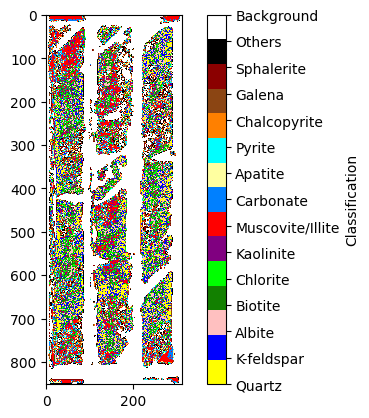

In [65]:
#Set mask to background value
#mask[mask == 0] = 11
#y_prime2 = y_prime2*mask
y_prime2[mask == 0] = 14

plt.imshow(y_prime2, cmap = cmap)
cbar = plt.colorbar(ticks=class_dict, label='Classification')
cbar.ax.set_yticklabels(mineral_dict)


## Consider the classification estimation

In [66]:
#Calculate the max values
confidence = clf.predict_proba(X2)
confidence = confidence.reshape(hypr2.shape[0], hypr2.shape[1], confidence.shape[-1])

max_prob = np.amax(confidence, axis=2)
np.max(max_prob)

mask_img = np.copy(mask)
mask_img[mask == 0] = np.nan

#Set new threshold for classification

#Set threshold
threshold = 0.5

In [67]:
#Define plotting colors dictionary:
mineral_dict3 = ['Quartz','K-feldspar','Albite','Biotite','Chlorite','Kaolinite','Muscovite/Illite','Carbonate','Apatite','Pyrite','Chalcopyrite','Galena','Sphalerite','Others','Background']

rgb_dict3 = [
    (255, 255, 0),   # Bright Yellow
    (0, 0, 255),     # Bright Blue
    (255, 192, 192),  # Light Pink
    (18, 128, 0),     # Dark Green
    (0, 255, 0),      # Green
    (128, 0, 128),    # Purple
    (255, 0, 0),     # Bright Red
    (0, 128, 255),   # Bright Sky Blue
    (255, 255, 160),  # Light Yellow
    (0, 255, 255),    # Cyan
    (255, 128, 0),    # Orange
    (139, 69, 19),    # Saddle Brown
    (139, 0, 0),      # Dark Red
    (0, 0, 0),  # Dim Gray
    (255, 255, 255)   # White
]


class_dict3 = np.arange(len(rgb_dict3))

#Create a dictionary using a dictionary comprehension
color_to_class3 = {tuple(rgb_dict3): class_dict3 for rgb_dict3, class_dict3 in zip(rgb_dict3, class_dict3)}

# Create a discrete colormap with 10 colors
cmap3 = ListedColormap(np.array(rgb_dict3)/255.0)


# Create a discrete colormap
cmap_p = ListedColormap(np.array(rgb_dict3)/255.0)

#set ticks location
# Set the tick locations to be in the middle of each class interval, Make an array 2x+1
mineral_p = []

for i, val in enumerate(mineral_dict3):
    mineral_p.append(" ")
    mineral_p.append(val)
mineral_p.append(" ")


rgb_dict_p = [value for val in rgb_dict3 for value in [val] * 2]

#Create a dictionary using a dictionary comprehension
cmap2 = ListedColormap(np.array(rgb_dict3)/255.0)
tick_locations = np.arange(0,len(mineral_dict3)+0.5,0.5)


In [68]:

plt.figure(figsize=(12,12))
#Plot original image
plt.subplot(1,2,1)
plt.imshow(to_rgb(hypr1))
plt.xlabel('X Pixel', fontsize = 12)
plt.ylabel('Y Pixel', fontsize = 12)
plt.title("Original hyperspectral image", fontsize = 14)

#Plot masked image
plt.subplot(1,2,2)
plt.imshow(to_rgb(hypr2))
plt.xlabel('X Pixel', fontsize = 12)
plt.ylabel('Y Pixel', fontsize = 12)
plt.title("Masked hyperspectral image", fontsize = 14)


plt.tight_layout()
plt.show()

plt.figure(figsize=(15,12))
#Plot Classification with
plt.subplot(1,2,1)
#Masked out
#Masked out
y_hat_pred = np.copy(y_prime2)
y_hat_pred[mask == 0] = 14
plt.imshow(y_hat_pred, cmap = cmap3)
cbar = plt.colorbar(ticks=tick_locations)
cbar.set_label('Classification', fontsize=12)
cbar.ax.set_yticklabels(mineral_p)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('X Pixel', fontsize = 12)
plt.ylabel('Y Pixel', fontsize = 12)
plt.title("Mineral classification", fontsize = 14)

#Plot confidence level
plt.subplot(1,2,2)
max_img = np.copy(max_prob)
max_img[mask == 0] = np.nan
plt.imshow(max_img)
cbar2 = plt.colorbar()
cbar2.set_label('Classification confidence probability', fontsize=12)
cbar2.ax.tick_params(labelsize=14)
plt.xlabel('X Pixel', fontsize = 12)
plt.ylabel('Y Pixel', fontsize = 12)
plt.title("Classification confidence", fontsize = 14)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [56]:
#Define plotting colors dictionary:
mineral_dict2 = ['Quartz','K-feldspar','Albite','Biotite','Chlorite','Kaolinite','Muscovite/Illite','Carbonate','Apatite_1','Pyrite','Chalcopyrite','Others','Background', 'Unclassified']
rgb_dict2 = [
    (255, 0, 0),     # Bright Red
    (0, 255, 0),     # Bright Green
    (0, 0, 255),     # Bright Blue
    (255, 255, 0),   # Bright Yellow
    (255, 0, 255),   # Bright Magenta
    (0, 255, 255),   # Bright Cyan
    (255, 128, 0),   # Bright Orange
    (0, 255, 128),   # Bright Lime
    (0, 128, 255),   # Bright Sky Blue
    (255, 255, 128), # Light Yellow
    (255, 128, 255), # Light Lavender
    (128, 255, 255), # Light Aqua
    (255, 255, 255), # Light Gray
    (255, 192, 192)  # Light Pink
]
class_dict2 = np.arange(len(rgb_dict2))

#Create a dictionary using a dictionary comprehension
color_to_class2 = {tuple(rgb_dict2): class_dict2 for rgb_dict2, class_dict2 in zip(rgb_dict2, class_dict2)}

# Create a discrete colormap with 10 colors
cmap2 = ListedColormap(np.array(rgb_dict2)/255.0)

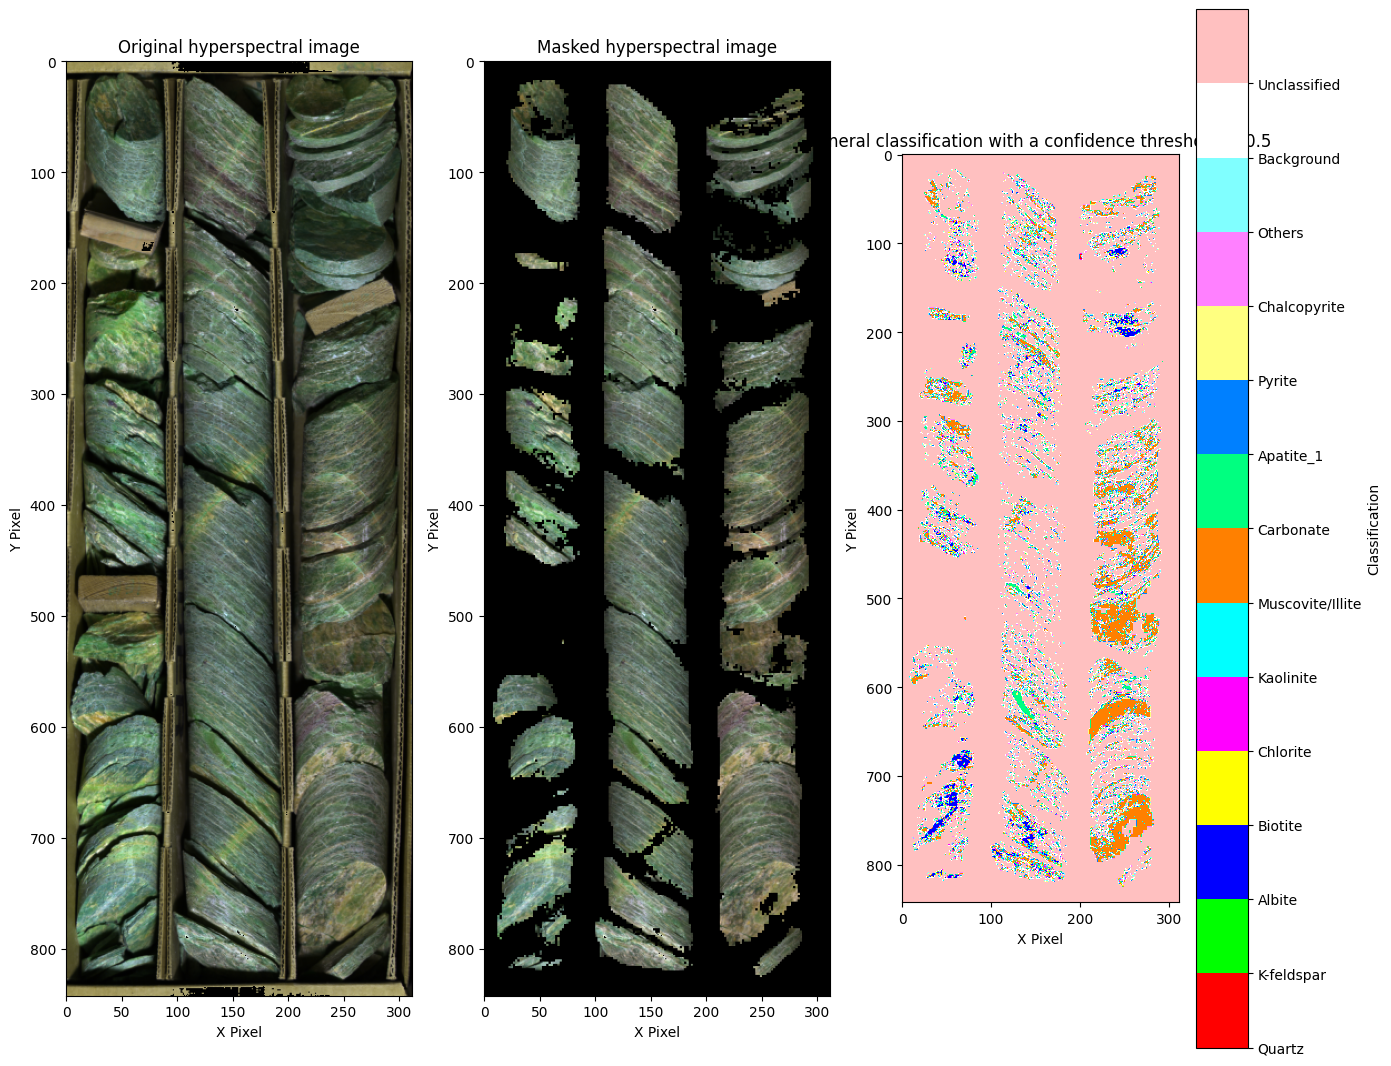

In [57]:

y_hat_norm = np.copy(y_prime2)
y_hat_norm [max_prob<=threshold] = 13 #Define unclassified

plt.figure(figsize=(14,12))
#Plot original image
plt.subplot(1,3,1)
plt.imshow(to_rgb(hypr1))
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title("Original hyperspectral image")

#Plot masked image
plt.subplot(1,3,2)
plt.imshow(to_rgb(hypr2))
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title("Masked hyperspectral image")

#Plot Classification with
plt.subplot(1,3,3)
#Masked out
y_hat_norm[mask == 0] = 14
plt.imshow(y_hat_norm, cmap = cmap2)
cbar = plt.colorbar(ticks=class_dict2, label='Classification')
cbar.ax.set_yticklabels(mineral_dict2)
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title("Mineral classification with a confidence threshold of 0.5")

plt.tight_layout()
plt.show()
